# Univariate Forecasting with pmdarima

## Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pmdarima as pm

### Data import and Preprocessing

In [2]:
data = pd.read_csv('sarim.txt')

In [3]:
data.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [4]:
data.shape

(204, 2)

In [5]:
data['date'] = pd.to_datetime(data['date'])

In [6]:
data = data.set_index('date')

### Train the model using 184 samples and test on 20 samples

In [7]:
train = data[:184]
test = data[184:]

In [8]:
train.shape, test.shape

((184, 1), (20, 1))

In [9]:
model = pm.auto_arima(train,start_p=1,start_q=1,m=12,start_P=1,start_Q=1,max_P=5,max_Q=5,\
                      max_D=2,seasonal=True,trace=True,stepwise=True,suppress_warnings=True,error_action='ignore')

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(1,1,1,12) [intercept=True]; AIC=361.021, BIC=379.871, Time=0.909 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=482.883, BIC=489.166, Time=0.016 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=393.307, BIC=405.874, Time=0.255 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=367.353, BIC=379.920, Time=0.765 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=480.967, BIC=484.108, Time=0.019 seconds
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=359.435, BIC=375.144, Time=0.516 seconds
Fit ARIMA(1,1,1)x(0,1,0,12) [intercept=True]; AIC=368.949, BIC=381.515, Time=0.144 seconds
Fit ARIMA(1,1,1)x(0,1,2,12) [intercept=True]; AIC=360.196, BIC=379.046, Time=1.863 seconds
Fit ARIMA(1,1,1)x(1,1,0,12) [intercept=True]; AIC=363.636, BIC=379.345, Time=0.429 seconds
Fit ARIMA(1,1,1)x(1,1,2,12) [intercept=True]; AIC=359.025, BIC=381.016, Time=2.457 seconds
Fit ARIMA(1,1,1)x(2,1,2,12) [intercept=True]; 

In [10]:
print(model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  184
Model:             SARIMAX(2, 1, 1)x(2, 1, [], 12)   Log Likelihood                -167.377
Date:                             Tue, 18 Aug 2020   AIC                            348.753
Time:                                     16:16:38   BIC                            370.745
Sample:                                          0   HQIC                           357.677
                                             - 184                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0076      0.002      4.047      0.000       0.004       0.011
ar.L1         -0.0528      

### Forecast the Model using test samples (20)

In [11]:
forecast = model.predict(n_periods=20,return_conf_int=True)

In [12]:
forecast

(array([18.99238762, 22.22091015, 23.87344157, 15.16513813, 17.11466798,
        16.36446138, 19.13112807, 18.09885741, 19.01243325, 20.1194398 ,
        18.88678261, 22.65104814, 21.06450757, 23.81021741, 25.41424813,
        16.93077819, 18.5618279 , 18.50155948, 20.3550789 , 20.05817877]),
 array([[17.75993262, 20.22484262],
        [20.98714557, 23.45467472],
        [22.56506232, 25.18182082],
        [13.85632839, 16.47394788],
        [15.79617831, 18.43315764],
        [15.04595251, 17.68297025],
        [17.81113067, 20.45112547],
        [16.7789035 , 19.41881132],
        [17.69218859, 20.3326779 ],
        [18.79922428, 21.43965532],
        [17.56649221, 20.20707301],
        [21.330771  , 23.97132528],
        [19.46092382, 22.66809132],
        [22.20640675, 25.41402808],
        [23.7771539 , 27.05134236],
        [15.29371582, 18.56784055],
        [16.91989863, 20.20375717],
        [16.859733  , 20.14338595],
        [18.71235375, 21.99780405],
        [18.41552191, 

### Put the forecasts in a dataframe and concat with original sample

In [13]:
forecast_df = pd.DataFrame(forecast[0],index=test.index,columns=['Prediction'])

In [14]:
results = pd.concat([data['value'],forecast_df],axis=1)

In [15]:
results.tail(25)

,value,Prediction
date,,
2006-06-01,16.291602,NaN
2006-07-01,16.980282,NaN
2006-08-01,18.612189,NaN
2006-09-01,16.623343,NaN
2006-10-01,21.430241,NaN
2006-11-01,23.575517,18.992388
2006-12-01,23.334206,22.220910
2007-01-01,28.038383,23.873442
2007-02-01,16.763869,15.165138


C:\Users\fobem\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'values')

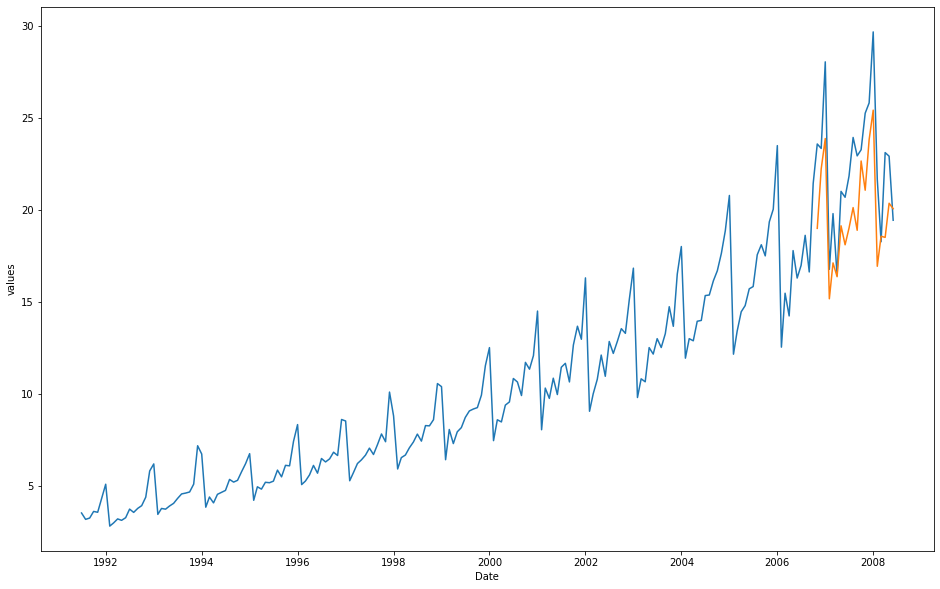

In [16]:
plt.figure(figsize=(16,10))
plt.plot(results)
plt.xlabel('Date')
plt.ylabel('values')

### Prepare a forecast for out of data date-range with 10 months out of date

In [17]:
#Forecast for 30 periods

forecast1 = model.predict(n_periods=30,return_conf_int=True)
forecast1

(array([18.99238762, 22.22091015, 23.87344157, 15.16513813, 17.11466798,
        16.36446138, 19.13112807, 18.09885741, 19.01243325, 20.1194398 ,
        18.88678261, 22.65104814, 21.06450757, 23.81021741, 25.41424813,
        16.93077819, 18.5618279 , 18.50155948, 20.3550789 , 20.05817877,
        20.72144606, 22.01523972, 21.48388223, 23.62909397, 23.33814755,
        25.32616793, 27.59177702, 18.26507424, 20.34038229, 19.93202064]),
 array([[17.75993262, 20.22484262],
        [20.98714557, 23.45467472],
        [22.56506232, 25.18182082],
        [13.85632839, 16.47394788],
        [15.79617831, 18.43315764],
        [15.04595251, 17.68297025],
        [17.81113067, 20.45112547],
        [16.7789035 , 19.41881132],
        [17.69218859, 20.3326779 ],
        [18.79922428, 21.43965532],
        [17.56649221, 20.20707301],
        [21.330771  , 23.97132528],
        [19.46092382, 22.66809132],
        [22.20640675, 25.41402808],
        [23.7771539 , 27.05134236],
        [15.29371582

### Put the forecast in a dataframe and concat with original dataset

In [18]:
forecast_range = pd.date_range(start='2006-11-01',periods=30,freq='MS')

In [19]:
forecast1_df = pd.DataFrame(forecast1[0],index=forecast_range,columns=['Predictions'])

In [20]:
forecast1_df.head()

,Predictions
2006-11-01,18.992388
2006-12-01,22.220910
2007-01-01,23.873442
2007-02-01,15.165138
2007-03-01,17.114668


In [21]:
forecast1_df.tail()

,Predictions
2008-12-01,25.326168
2009-01-01,27.591777
2009-02-01,18.265074
2009-03-01,20.340382
2009-04-01,19.932021


In [22]:
results2 = pd.concat([data.value,forecast1_df],axis=1)

In [23]:
results2.tail(35)

,value,Predictions
2006-06-01,16.291602,NaN
2006-07-01,16.980282,NaN
2006-08-01,18.612189,NaN
2006-09-01,16.623343,NaN
2006-10-01,21.430241,NaN
2006-11-01,23.575517,18.992388
2006-12-01,23.334206,22.220910
2007-01-01,28.038383,23.873442
2007-02-01,16.763869,15.165138
2007-03-01,19.792754,17.114668


### Plot the results

In [24]:
lower = pd.Series(forecast1[1][:,0],index=forecast_range)
upper = pd.Series(forecast1[1][:,1],index=forecast_range)

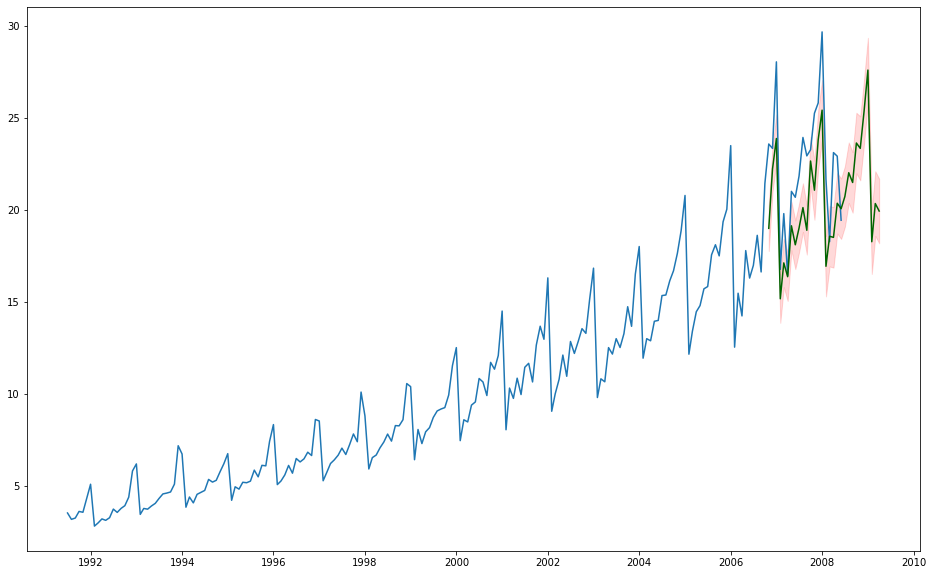

In [25]:
plt.figure(figsize=(16,10))
plt.plot(data['value'])
plt.plot(forecast1_df,color = 'darkgreen')
plt.fill_between(forecast_range,lower,upper,color='red',alpha=0.15)

### Check the diagnostics

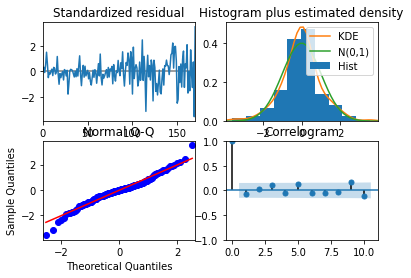

In [26]:
out = model.plot_diagnostics()